In [39]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [4]:
image_dir="./brain_tumor_dataset/augmented-images/yes"

In [5]:
img = cv2.imread('aug_Y105_0_5139.jpg')

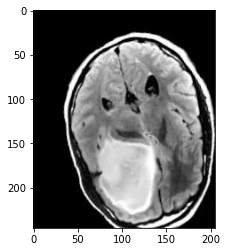

In [6]:
plt.imshow(img)

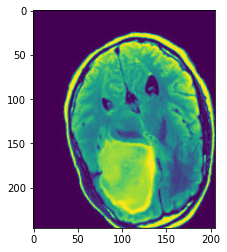

In [44]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [47]:
smoothed_img = cv2.bilateralFilter(img,10,100,100)


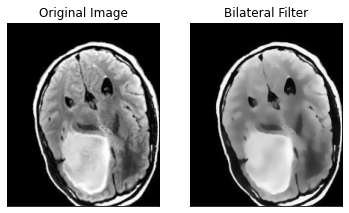

In [48]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(smoothed_img)
plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.title('Bilateral Filter')
plt.show()

In [13]:
#Enhancement
enhanced_img = cv2.convertScaleAbs(smoothed_img, alpha=1.3, beta=.8)

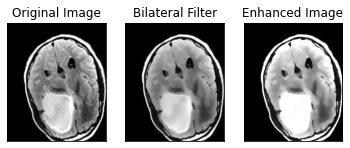

In [14]:
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(smoothed_img)
plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.title('Bilateral Filter')
plt.subplot(1, 3, 3)
plt.imshow(enhanced_img)
plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.title('Enhanced Image')
plt.show()

In [30]:
#finding suspicious area
thresh = 210
maxValue = 255

thresh_value, img_binary_sus1 = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY)

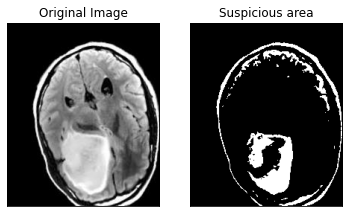

In [32]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_binary_sus1)
plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.title('Suspicious area')

plt.show()

In [49]:
#finding suspicious area
thresh = 210
maxValue = 255

thresh_value, img_binary_sus2 = cv2.threshold(img_gray, thresh, maxValue, cv2.THRESH_BINARY)

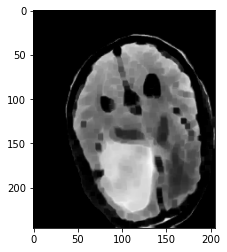

In [36]:
#Morphological Operations
#Erosion
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations=1)
plt.imshow(erosion)

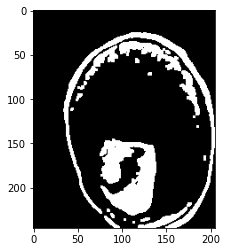

In [38]:
#Dilation
kernel = np.ones((3,3), np.int8)
erosion = cv2.dilate(img_binary_sus1,kernel, iterations=1)
plt.imshow(erosion)

In [51]:
#Contours for suspicious area

cnts_for_sus_1 = cv2.findContours(img_binary_sus2.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts_for_sus_1 = imutils.grab_contours(cnts_for_sus_1)

c1_max = max(cnts_for_sus_1, key=cv2.contourArea)
contour_detect=cv2.drawContours(img, [c1_max], -1, (0,255,0), 1)

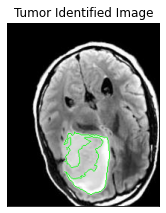

In [58]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(contour_detect)
plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.title('Tumor Identified Image')

plt.show()
